# Naive Bayes

## Naive Bayes Classifier in Scikit-learn

In [1]:
# First Feature
weather = [
    'Sunny', 'Sunny',
    'Overcast', 'Rainy',
    'Rainy', 'Rainy',
    'Overcast', 'Sunny',
    'Sunny', 'Rainy',
    'Sunny', 'Overcast',
    'Overcast', 'Rainy'
]

# Second Feature
temp = [
    'Hot', 'Hot',
    'Hot', 'Mild',
    'Cool', 'Cool',
    'Cool', 'Mild',
    'Cool', 'Mild',
    'Mild', 'Mild',
    'Hot', 'Mild'
]

# Label or Target Variable
play = [
    'No', 'No',
    'Yes', 'Yes',
    'Yes', 'No',
    'Yes', 'No',
    'Yes', 'Yes',
    'Yes', 'Yes',
    'Yes', 'No'
]

In [4]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # bikin instance labelencoder

# Encoding Weather
weather_encoded = le.fit_transform(weather)
print("Weather :", weather_encoded)#, sep='\n')

weather_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(weather_mapping, '\n')

# Encoding Temperature
temp_encoded = le.fit_transform(temp)
print("Temperature :",temp_encoded)#, sep='\n')

temp_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(temp_mapping, '\n')

# Encoding class/label Play
label = le.fit_transform(play)
print("Play (the label):", label)#, sep='\n')

play_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(play_mapping, '\n')

Weather : [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
{'Overcast': 0, 'Rainy': 1, 'Sunny': 2} 

Temperature : [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
{'Cool': 0, 'Hot': 1, 'Mild': 2} 

Play (the label): [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
{'No': 0, 'Yes': 1} 



In [6]:
features = list(zip(weather_encoded, temp_encoded))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [7]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [9]:
# Create a Gaussian Classifier
model = GaussianNB()

In [10]:
# Train the model using the training sets
model.fit(features, label)

GaussianNB()

In [12]:
# Predict Output
# 0: Overcast, 2: Mild
predicted = model.predict([[0,2]])
print('Predicted value :', predicted)

Predicted value : [1]


## Naive Bayes with Multiple Label

In [13]:
from sklearn import datasets

# Load dataset
wine = datasets.load_wine()

In [17]:
# print the names of features
print("Features :\n", wine.feature_names)

# print the labels
print("Class :",wine.target_names)

Features :
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Class : ['class_0' 'class_1' 'class_2']


In [18]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [19]:
# check the target data
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [20]:
from sklearn.model_selection import train_test_split

# split into train set dan test set
# Train 70%, Test 30%
X_train, X_test, y_train, y_test = train_test_split(
    wine.data,    # X
    wine.target,  # y
    test_size=.3, 
    random_state=109
    )

In [21]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create and Train model using Training sets
gnb = GaussianNB().fit(X_train, y_train)

# Predict the response for test Datasets
y_pred = gnb.predict(X_test)
print(y_pred)

[0 0 1 2 0 1 0 0 1 0 2 2 2 2 0 1 1 0 0 1 2 1 0 2 0 0 1 2 0 1 2 1 1 0 1 1 0
 2 2 0 2 1 0 0 0 2 2 0 1 1 2 0 0 2]


In [22]:
# import library for accuracy calculation
from sklearn import metrics

# model accuracy, how often is the classifier correct
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9074074074074074


# Decision Tree Classifier

## DTClassifier with Scikit-learn

In [2]:
# Load Libraries
import pandas as pd

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import Metrics Calculation
from sklearn import metrics

In [3]:
prefix = '/Users/melawai.it/'
path = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 13/diabetes.csv'

In [4]:
col_names = ['pregrant', 'glucose', 'bp', 
             'skin', 'insulin', 'bmi', 
             'pedigree', 'age', 'label'
            ]
# Load Dataset
pima = pd.read_csv(path, header=None, names=col_names, skiprows=1)

In [35]:
pima.head()

,pregrant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregrant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
# Check Missing Value
pima.isna().sum()

pregrant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [5]:
# Split dataset in features and target variable
feature_cols = ['pregrant', 'glucose', 'bp', 
             'skin', 'insulin', 'bmi', 
             'pedigree', 'age'
            ]
X = pima[feature_cols]
y = pima.label

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = .3, # 70% Training sets, 30% Test sets
    random_state = 1
    )

In [43]:
# Create Model - Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train model using train sets
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [44]:
# Model Accuracy, how often is the classifier correct
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.670995670995671


In [10]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

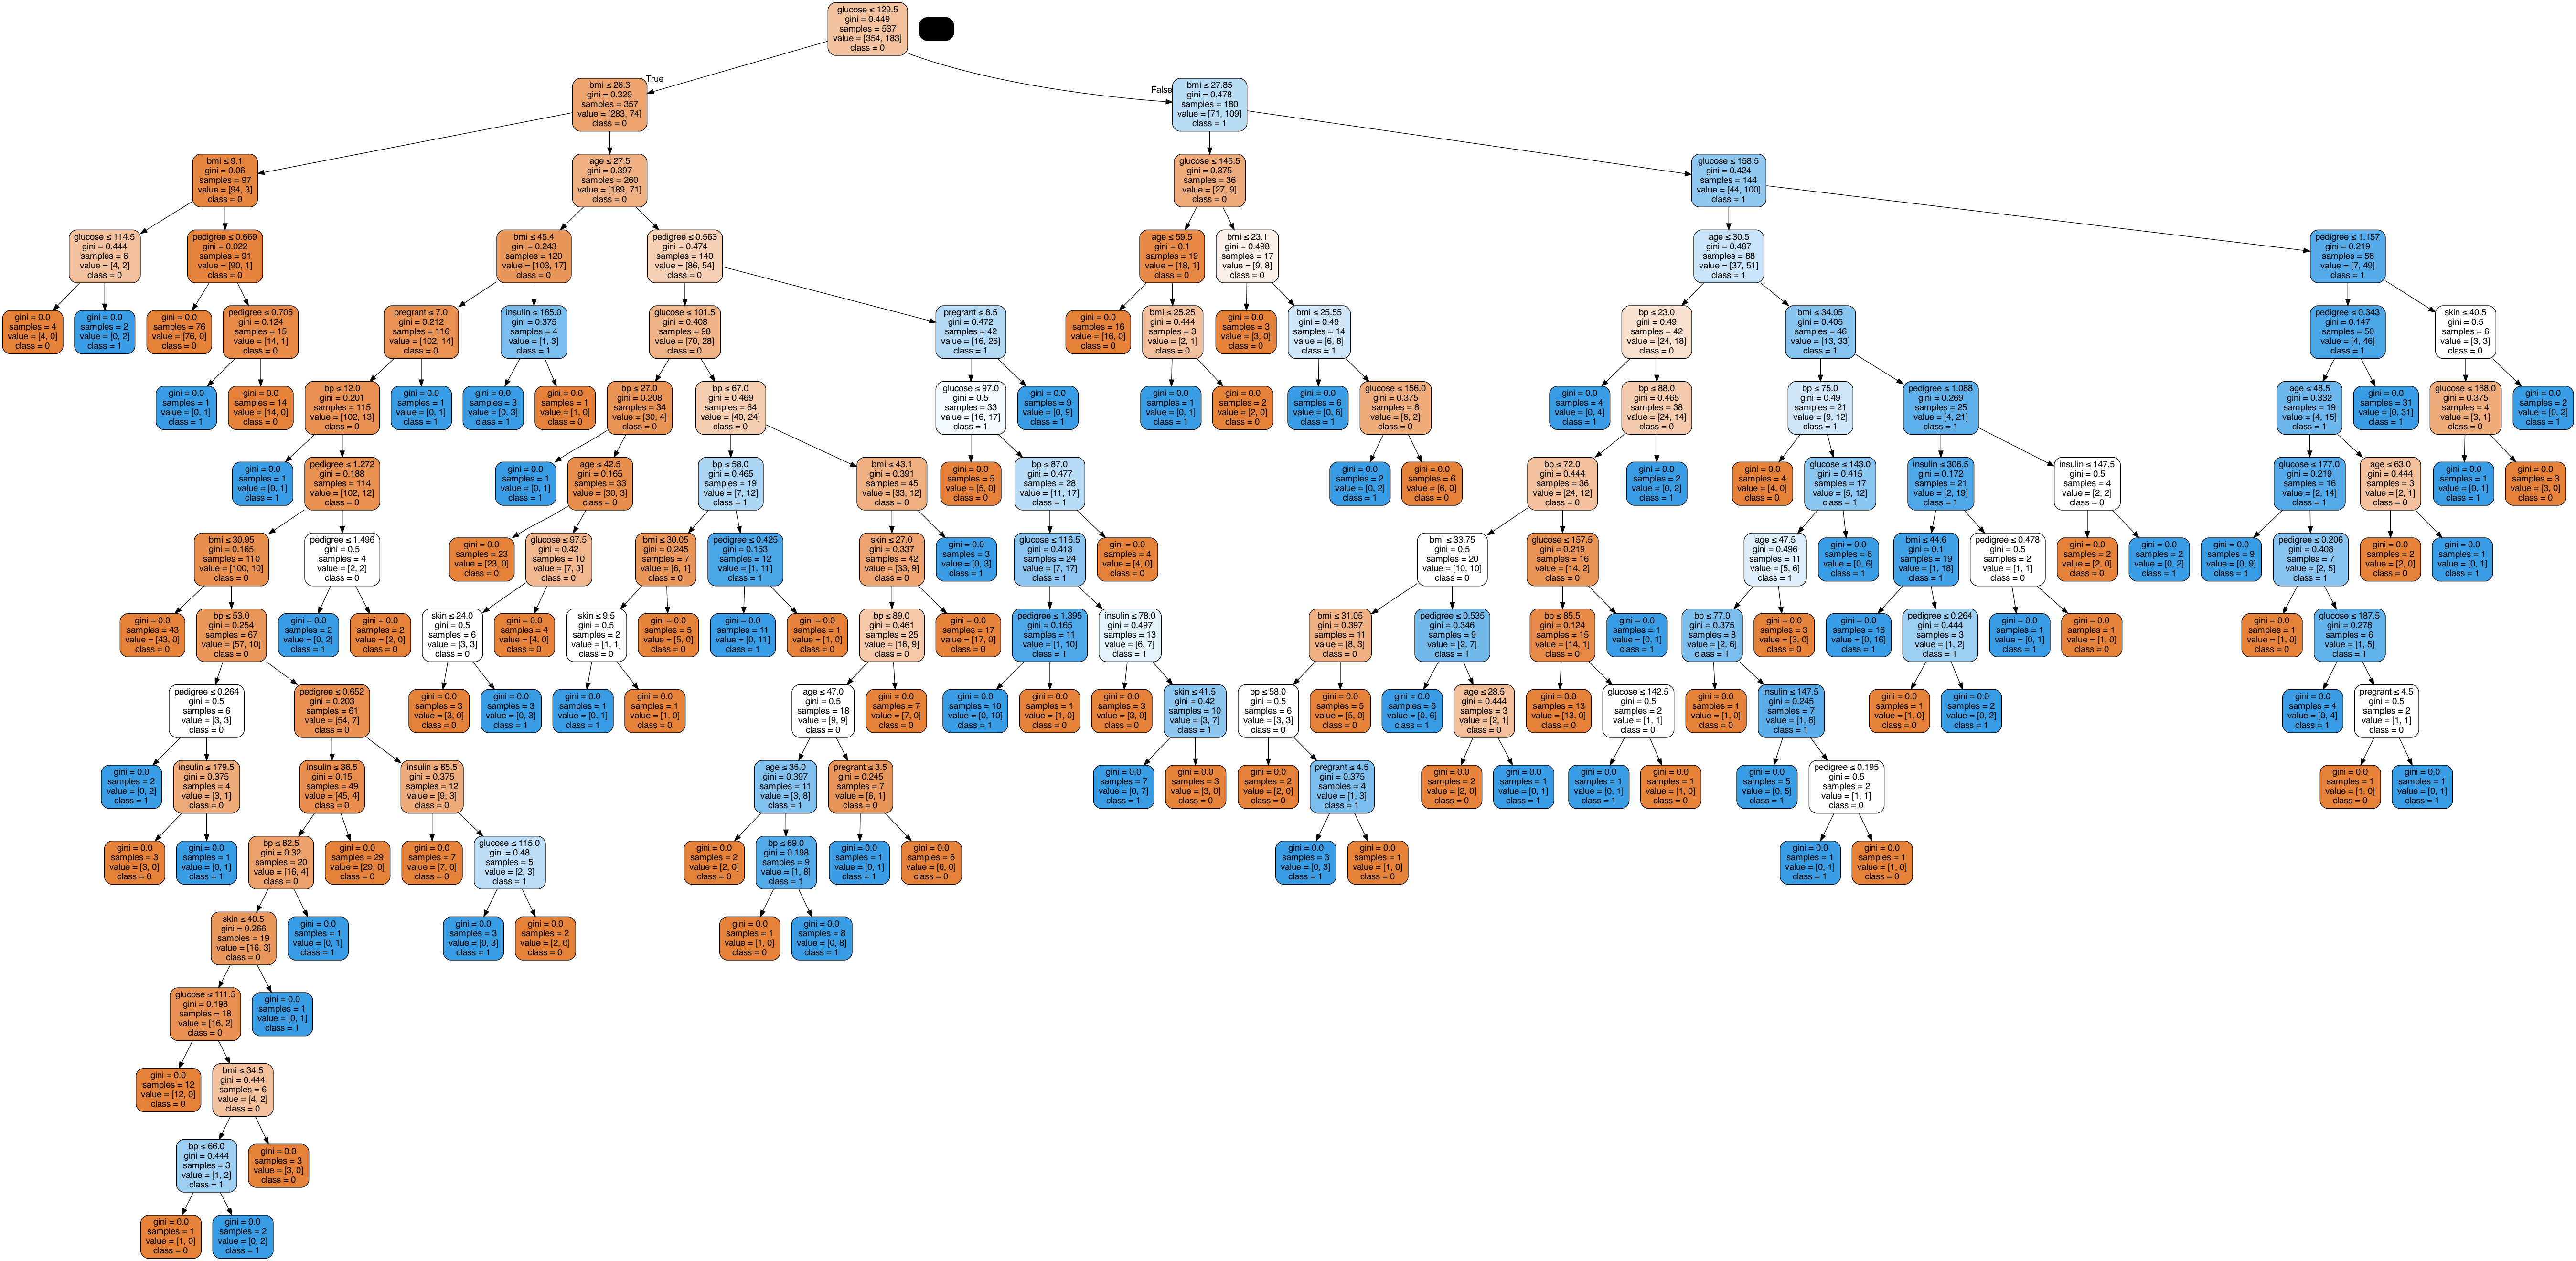

In [49]:
dot_data = StringIO()
tree.export_graphviz(
    clf,
    out_file = dot_data,
    class_names = ['0','1'], # Target Names
    feature_names = feature_cols,
    filled = True,  # Whether to fill in the boxes with colours
    rounded = True, # Whether to round the corners of the boxes
    special_characters = True
    )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Optimizing Decision Tree Performance

In [7]:
# Create Model - Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train model using train sets
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
# Model Accuracy, how often is the classifier correct
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.7705627705627706


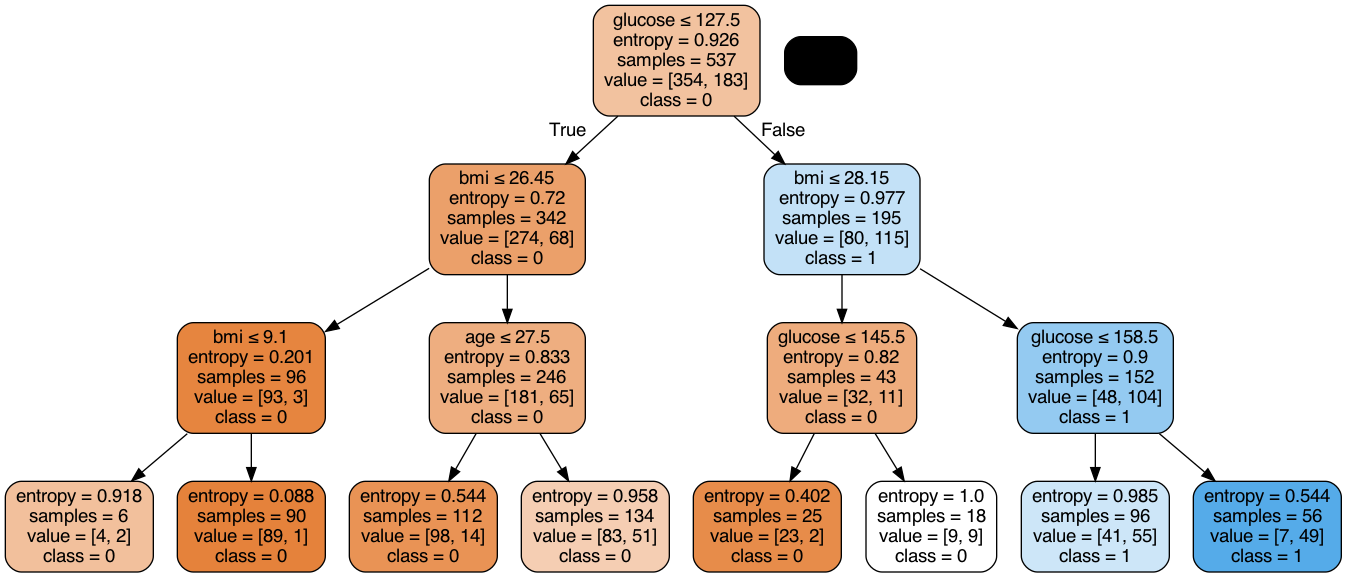

In [11]:
dot_data = StringIO()
tree.export_graphviz(
    clf,
    out_file = dot_data,
    class_names = ['0','1'], # Target Names
    feature_names = feature_cols,
    filled = True,  # Whether to fill in the boxes with colours
    rounded = True, # Whether to round the corners of the boxes
    special_characters = True
    )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest

## Build a classifier using Scikit_learn

In [12]:
# import sklearn dataset library
from sklearn import datasets

# load dataset
iris = datasets.load_iris()

In [13]:
# print label species
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
# Print the iris data (top 5)
print(iris.data[0:5])

print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
# Creating a DataFrame of given iris dataset
import pandas as pd

data = pd.DataFrame({
    'sepal length': iris.data[:,0],
    'sepal width' : iris.data[:,1],
    'petal length': iris.data[:,2],
    'petal width' : iris.data[:,3],
    'species' : iris.target
})

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# Features
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]

# Target/Label
y = data['species']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = .3, # 70% Train Sets, 30% Test Sets
    random_state = 1
    )

In [19]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Create a RF Classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the model using Train Sets
rf.fit(X_train, y_train)

# Predict the X_test result
y_pred = rf.predict(X_test)

In [20]:
# Import Metrics module
from sklearn import metrics

# Get the Accuracy of the model
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9555555555555556


In [21]:
rf.predict([[3, 5, 4, 2]])

/Users/melawai.it/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

## Finding Important Features in scikit-learn

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Create a RF Classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
import pandas as pd

feature_imp = pd.Series(rf.feature_importances_, 
                        index=iris.feature_names,
                        ).sort_values(ascending=False)

feature_imp

petal width (cm)     0.508040
petal length (cm)    0.388383
sepal length (cm)    0.076079
sepal width (cm)     0.027498
dtype: float64

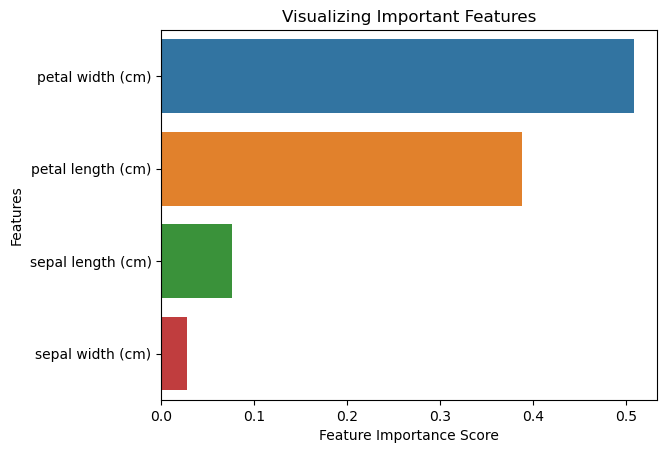

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating Barplot
sns.barplot(x=feature_imp,
            y=feature_imp.index
           )
# Add Labels to the Graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

## Creating the Model on Selected Features

In [42]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
X = data[['sepal length', 'petal length', 'petal width']]
y = data['species']

# Split dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = .7, # 30% Train Set, 70% Test Set
    random_state = 1
)

In [43]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Create a RF Classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the model using Train Sets
rf.fit(X_train, y_train)

# Predict the X_test result
y_pred = rf.predict(X_test)

# Import Metrics module
from sklearn import metrics

# Get the Accuracy of the model
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9428571428571428


# SVM

## Building SVM in scikit-learn

### Loading Data

In [44]:
# Loading data
cancer = datasets.load_breast_cancer()

### Exploring Data

In [45]:
print('Features :\n', cancer.feature_names)

print('Labels :\n', cancer.target_names)

Features :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels :
 ['malignant' 'benign']


In [46]:
cancer.data.shape

(569, 30)

In [47]:
print(cancer.data[:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [48]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

### Splitting Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    test_size=.3, # 70% Train Set, 30% Test Set
    random_state=109
    )

### Generating Model

In [50]:
# Import SVM Model
from sklearn import svm

# Create a SVM Classifier
svm_ = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using Training Sets
svm_.fit(X_train, y_train)

# Predict the Response for test dataset
y_pred = svm_.predict(X_test)

### Evaluating Model

In [51]:
# Import Metrics module
from sklearn import metrics

# Get the Accuracy of the model
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9649122807017544


In [52]:
print("Precision :", metrics.precision_score(y_test, y_pred))
print("Recall :", metrics.recall_score(y_test, y_pred))

Precision : 0.9811320754716981
Recall : 0.9629629629629629


## Exercise: Multiple Algorithm on Dataset

In [53]:
import numpy as np
import pandas as pd

In [54]:
path = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 13/train.csv'

In [56]:
train = pd.read_csv(path)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [58]:
print('Train Data :')
print(train.isnull().sum())

Train Data :
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [59]:
train.fillna(train.mean(), inplace=True)
train.isnull().sum()

/var/folders/pw/z_nfq_0j4g3ckjz532ktnkjm0000gn/T/ipykernel_5728/705823306.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.mean(), inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
train.Gender.fillna(train.Gender.mode()[0], inplace=True)
train.Married.fillna(train.Married.mode()[0], inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0], inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0], inplace=True)

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

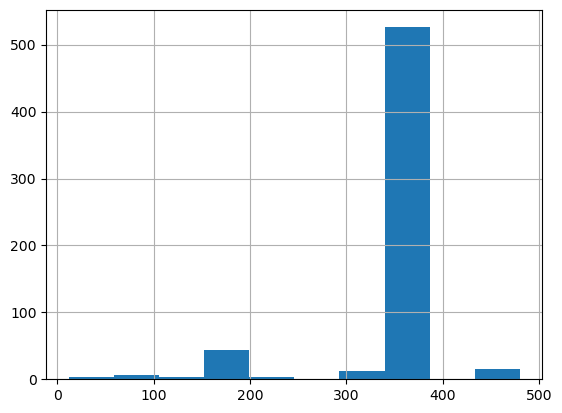

In [61]:
train.Loan_Amount_Term.hist()

In [62]:
train.Loan_Amount_Term = np.log(train.Loan_Amount_Term)

<Axes: >

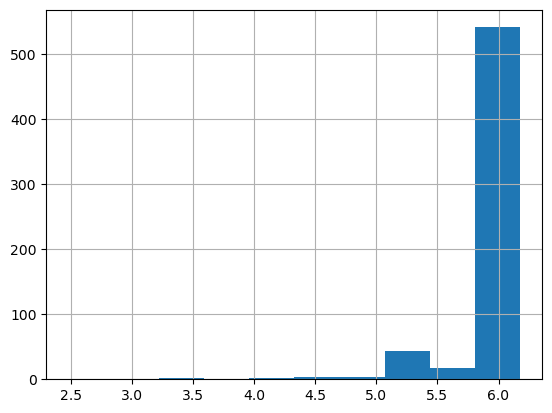

In [63]:
train.Loan_Amount_Term.hist()

In [64]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

In [65]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)

In [66]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,5.886104,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,5.886104,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,5.886104,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [68]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
    random_state=1
)

In [95]:
import seaborn as sns
sns.set_palette(sns.color_palette('pastel'))

### Logistic Regression

Logistic Regresion:80.49
              precision    recall  f1-score   support

           N       0.94      0.41      0.57        39
           Y       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



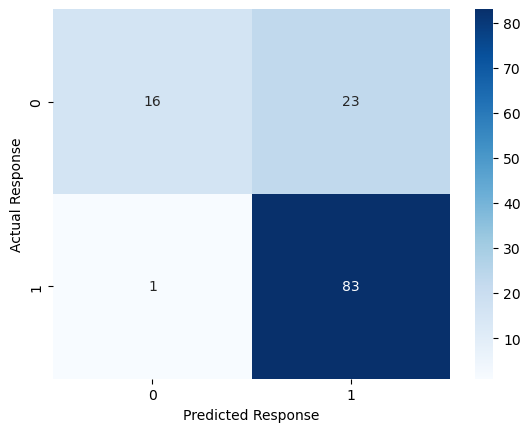

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

logreg = LogisticRegression(max_iter=1000)        # Create Model
logreg.fit(X_train, y_train)                      # Train Model

#Evaluate Model 
y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Logistic Regresion:'+str(acc_log))
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Response')
plt.xlabel('Predicted Response')
        
plt.show()

### Decision Tree

Decision Tree:78.86
              precision    recall  f1-score   support

           N       0.84      0.41      0.55        39
           Y       0.78      0.96      0.86        84

    accuracy                           0.79       123
   macro avg       0.81      0.69      0.71       123
weighted avg       0.80      0.79      0.76       123



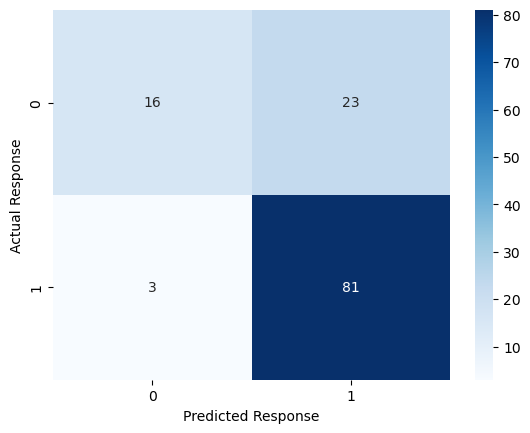

In [103]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()        # Create Model
dtc.fit(X_train, y_train)                      # Train Model

#Evaluate Model 
y_pred = dtc.predict(X_test)
acc_dtc = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Decision Tree:'+str(acc_dtc))
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Response')
plt.xlabel('Predicted Response')
        
plt.show()

### Random Forest Classifier

Random Forest :80.49
              precision    recall  f1-score   support

           N       0.94      0.41      0.57        39
           Y       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



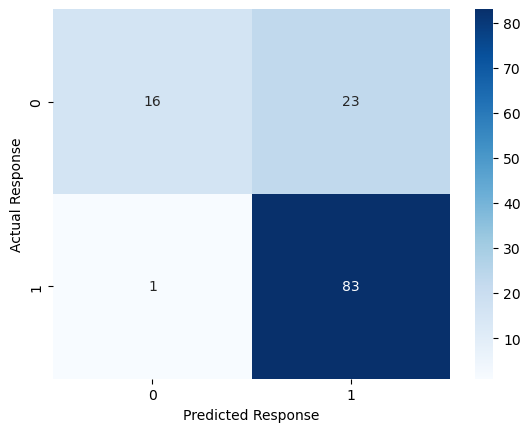

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()        # Create Model
rf.fit(X_train, y_train)                      # Train Model

#Evaluate Model 
y_pred = rf.predict(X_test)
acc_rf = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Random Forest :'+str(acc_rf))
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Response')
plt.xlabel('Predicted Response')
        
plt.show()

### SVM

SVM :67.48
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        39
           Y       0.68      0.99      0.81        84

    accuracy                           0.67       123
   macro avg       0.34      0.49      0.40       123
weighted avg       0.46      0.67      0.55       123



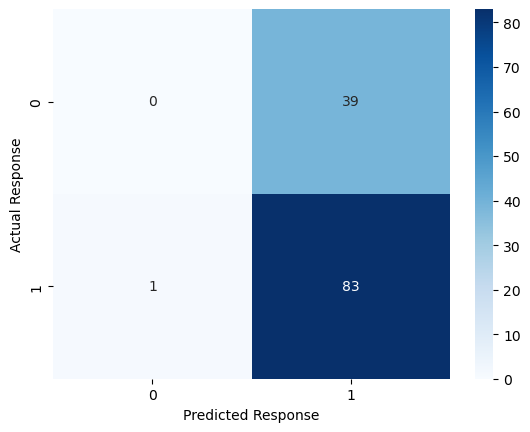

In [106]:
from sklearn import svm

svm_ = svm.SVC()        # Create Model
svm_.fit(X_train, y_train)                      # Train Model

#Evaluate Model 
y_pred = svm_.predict(X_test)
acc_svm = round(accuracy_score(y_test, y_pred) * 100, 2)
print('SVM :'+str(acc_svm))
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Response')
plt.xlabel('Predicted Response')
        
plt.show()

### Gaussian Naive Bayes

Naive Bayes :79.67
              precision    recall  f1-score   support

           N       0.82      0.46      0.59        39
           Y       0.79      0.95      0.86        84

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.73       123
weighted avg       0.80      0.80      0.78       123



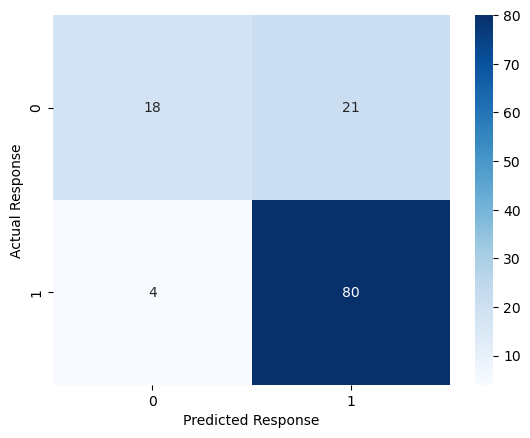

In [108]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()           # Create Model
nb.fit(X_train, y_train)  # Train Model

#Evaluate Model 
y_pred = nb.predict(X_test)
acc_nb = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Naive Bayes :'+str(acc_nb))
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Response')
plt.xlabel('Predicted Response')
        
plt.show()

### KNN

/Users/melawai.it/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN :57.72
              precision    recall  f1-score   support

           N       0.28      0.21      0.24        39
           Y       0.67      0.75      0.71        84

    accuracy                           0.58       123
   macro avg       0.47      0.48      0.47       123
weighted avg       0.55      0.58      0.56       123



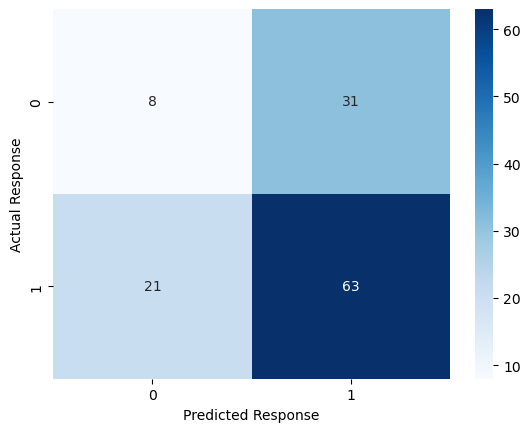

In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) # Create Model
knn.fit(X_train, y_train)    # Train Model

#Evaluate Model 
y_pred = knn.predict(X_test.values)
acc_knn = round(accuracy_score(y_test, y_pred) * 100, 2)
print('KNN :'+str(acc_knn))
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Response')
plt.xlabel('Predicted Response')
        
plt.show()